In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def draw_graph(G, highlight_edges=None, output_file=None):
    pos = nx.nx_agraph.graphviz_layout(G)
    # pos = nx.spring_layout(G)
    network_options = {
        "pos": pos,
        "font_size": 16,
        "font_color": "w",
        "font_family": "monospace",
        "node_size": 1000,
    }

    if G.is_directed():
        network_options["arrowsize"] = 20

    edge_labels_options = {
        "pos": pos,
        "edge_labels": nx.get_edge_attributes(G, "weight"),
        "font_size": 12,
        "font_family": "monospace",
        "rotate": False,
    }
    nx.draw_networkx(G, **network_options)

    if highlight_edges:
        edges_options = {
            "pos": pos,
            "edgelist": highlight_edges,
            "width": 5,
            "alpha": 0.5,
            "edge_color": "tab:orange",
        }
        nx.draw_networkx_edges(G, **edges_options)

    nx.draw_networkx_edge_labels(G, **edge_labels_options)
    plt.axis("off")
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)

    plt.show()

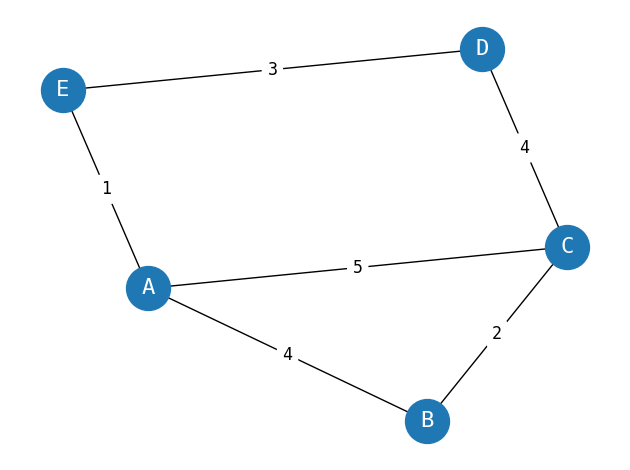

In [3]:
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=5)
G.add_edge("A", "E", weight=1)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "D", weight=4)
G.add_edge("D", "E", weight=3)

draw_graph(G, output_file="figuras/grafo-con-pesos.png")

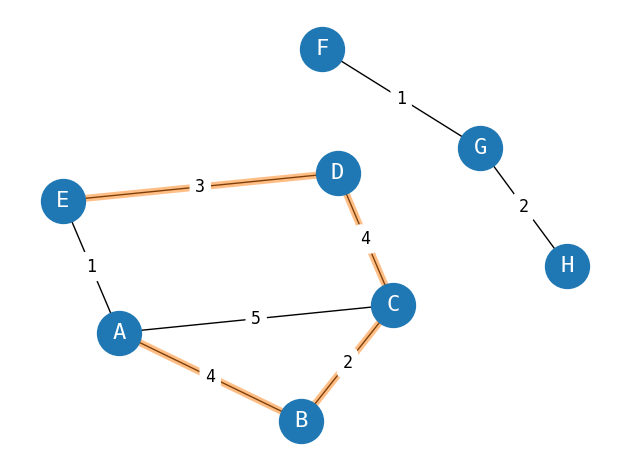

In [4]:
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=5)
G.add_edge("A", "E", weight=1)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "D", weight=4)
G.add_edge("D", "E", weight=3)
G.add_edge("F", "G", weight=1)
G.add_edge("G", "H", weight=2)

path = next(nx.all_simple_paths(G, source="A", target="E"))
highlight_edges = list(zip(path, path[1:]))

draw_graph(G, highlight_edges=highlight_edges, output_file="figuras/grafo-camino.png")

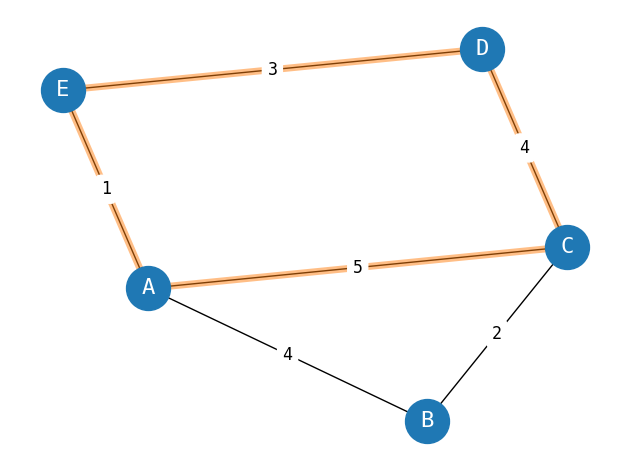

In [5]:
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=5)
G.add_edge("A", "E", weight=1)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "D", weight=4)
G.add_edge("D", "E", weight=3)

cycle = nx.cycle_basis(G, root="E")[0]
highlight_edges = list(zip(cycle, cycle[1:] + cycle[:1]))

draw_graph(G, highlight_edges=highlight_edges, output_file="figuras/grafo-ciclo.png")

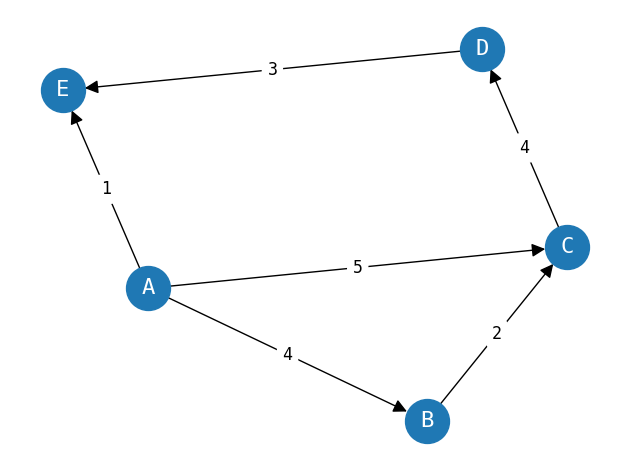

In [6]:
G = nx.DiGraph()
G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=5)
G.add_edge("A", "E", weight=1)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "D", weight=4)
G.add_edge("D", "E", weight=3)

draw_graph(G, output_file="figuras/grafo-dirigido.png")

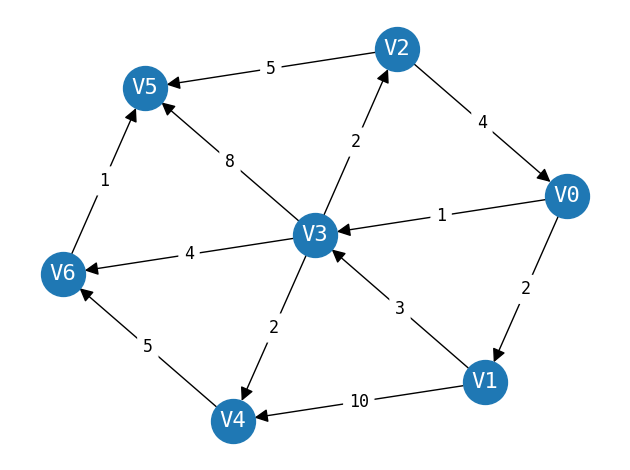

In [7]:
G = nx.DiGraph()
G.add_edge("V0", "V1", weight=2)
G.add_edge("V0", "V3", weight=1)
G.add_edge("V1", "V3", weight=3)
G.add_edge("V1", "V4", weight=10)
G.add_edge("V2", "V0", weight=4)
G.add_edge("V2", "V5", weight=5)
G.add_edge("V3", "V2", weight=2)
G.add_edge("V3", "V4", weight=2)
G.add_edge("V3", "V5", weight=8)
G.add_edge("V3", "V6", weight=4)
G.add_edge("V4", "V6", weight=5)
G.add_edge("V6", "V5", weight=1)

draw_graph(G, output_file="figuras/grafo-teoria.png")

In [10]:
nx.adjacency_matrix(G).todense()

array([[ 0,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  3, 10,  0,  0,  0],
       [ 0,  0,  0,  2,  2,  8,  4],
       [ 0,  0,  0,  0,  0,  0,  5],
       [ 4,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0]])

In [11]:
nx.nodes(G)

NodeView(('V0', 'V1', 'V3', 'V4', 'V2', 'V5', 'V6'))